# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/user/data/mouse_metadata.csv"
study_results_path = "/Users/user/data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data =  pd.merge(mouse_metadata, study_results,how='right')

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']] # We use the double bracket so the output is a dataframe

combined_data.head ()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
mice_count = len(mice)
mice_count

249

In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id =combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [98]:
# Optional: Get all the data for the duplicate mouse ID.


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_id) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice in the clean DataFrame.
mice = clean_df["Mouse ID"].value_counts()
mice_count = len(mice)
mice_count

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_reg_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_reg_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_reg_var = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg('var')
drug_reg_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_reg_SEM = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
              "Mean Tumor Volume": drug_reg_mean, 
              "Median Tumor Volume": drug_reg_median,
              "Tumor Valume Variance": drug_reg_var,
              "Tumor Volume Std": drug_reg_std,
              "Tumor Volume Std.Error": drug_reg_SEM})

summary_df["Mean Tumor Volume"] = summary_df["Mean Tumor Volume"].map("{:,.6f}".format)
summary_df["Median Tumor Volume"] = summary_df["Median Tumor Volume"].map("{:,.6f}".format) 

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Valume Variance,Tumor Volume Std,Tumor Volume Std.Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_table = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem']) 
summary_agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

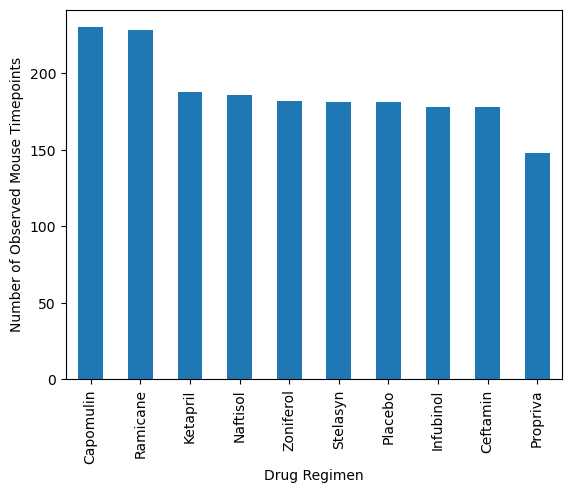

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='tab:blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

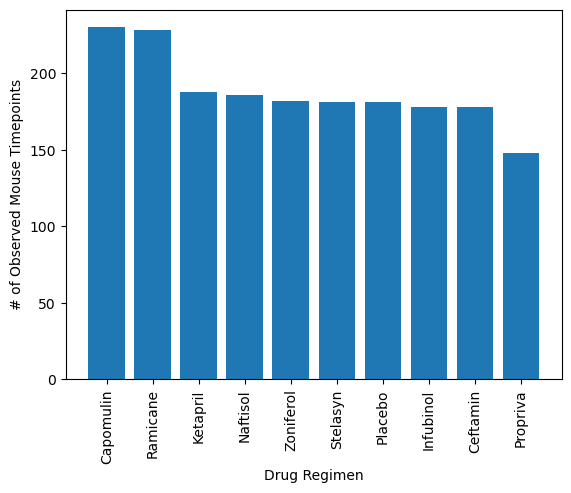

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'tab:blue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

<Axes: ylabel='count'>

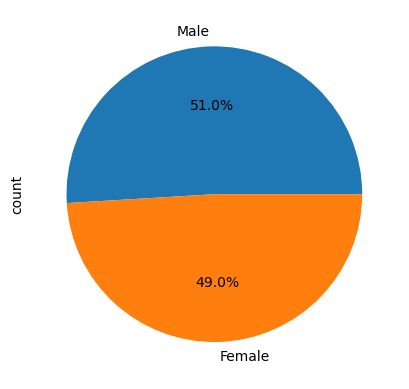

In [107]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_df["Sex"].value_counts()

# Make the pie chart
gender_data.plot.pie(autopct = "%1.1f%%") 

Text(0, 0.5, 'sex')

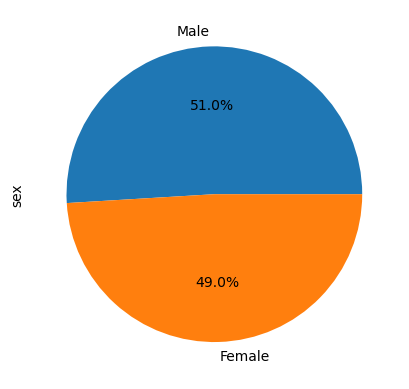

In [108]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male","Female"]
Sizes = [51, 49]


# Make the pie chart
plot = gender_data.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel("sex")

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse = clean_df.groupby(["Mouse ID"]).max()
each_mouse_cleared = each_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merge_df = each_mouse_cleared[['Mouse ID', 'Timepoint']].\
         merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = "left")
Merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = clean_df['Drug Regimen'].tolist()
#treatment_df = []

   
    
# Create empty list to fill with tumor vol data (for plotting)
   
def get_outliers(treatment):
    treatment_df = Merge_df.loc[Merge_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
    
    quartiles = treatment_df.quantile([.25,.5,.75])


# Calculate the IQR and quantitatively determine if there are any potential outliers.

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    return treatment_df
capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


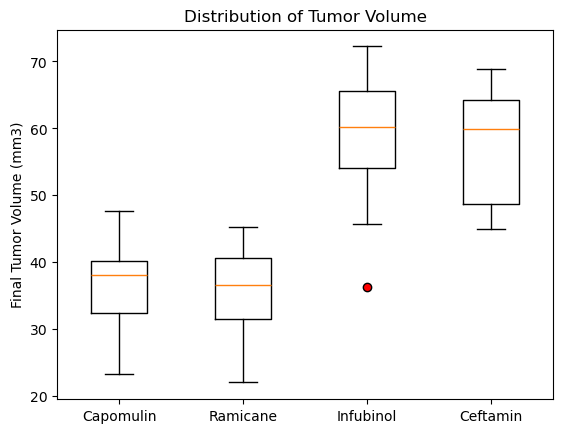

In [112]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red")
plt.boxplot([capo, rami, infu, ceft], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume')
plt.show()

## Line and Scatter Plots

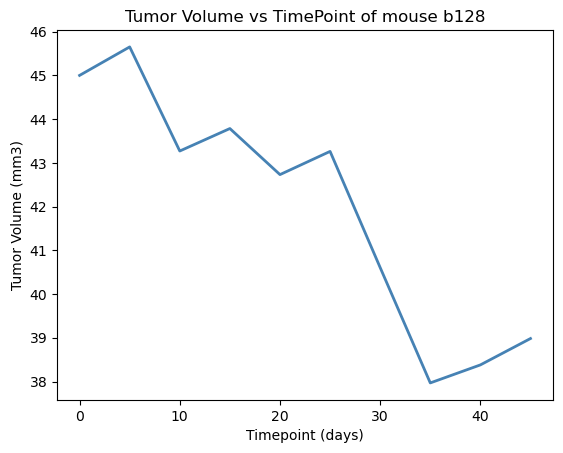

In [114]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:] 
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
# Format and labels

plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue", label = "Fahreneit")
plt.title('Tumor Volume vs TimePoint of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

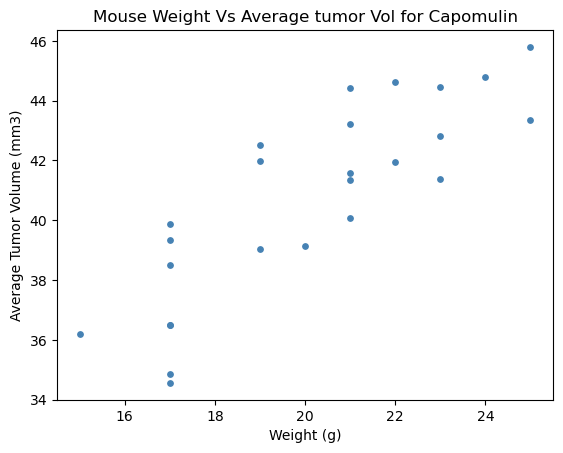

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_capo_vol = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Create a scatter plot
marker_size = 15

plt.scatter(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'], color="steelblue", s=marker_size)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Vs Average tumor Vol for Capomulin')

plt.show()

## Correlation and Regression

the correlation coefficient between both factors is0.84


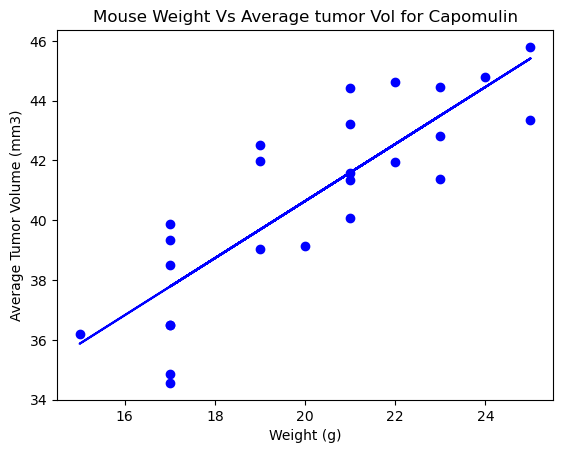

In [117]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Corre = st.pearsonr(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'])
print (f"the correlation coefficient between both factors is{round(Corre[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
values_for_formula = avg_capo_vol["Weight (g)"] * slope + intercept

plt.scatter(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'], color = 'blue')
plt.plot(avg_capo_vol['Weight (g)'], values_for_formula, color = 'blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Vs Average tumor Vol for Capomulin')

plt.show()